# Import necessary dictionaries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import date

# Loading data and checking samples

In [3]:
df = pd.read_csv(r'C:\Users\tamla_f1yewqh\OneDrive\Desktop\Python\Pandas\Keith\complete-pandas-tutorial\Netflix\netflix_titles.csv')
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
# numnber of rows, columns
print(f'This table has {df.shape[0]} rows and {df.shape[1]} columns')

This table has 8807 rows and 12 columns


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


# Data cleaning and preparation

In [6]:
# snap shot of missing data in each column
na_counts = df.isna().sum(axis=0)
na_counts

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [7]:
from numpy import nan as NA

In [8]:
# replace na value with no data, use replace or fillna({col} : {value},...)
df.fillna({'country': 'No data'}, inplace=True)
df.fillna({'cast': 'No data'}, inplace=True)
df.fillna({'director': 'No data'}, inplace=True)

# droping na rows and duplicated row
df.dropna(how='any', inplace=True)
df.drop_duplicates(inplace= True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8790 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   cast          8790 non-null   object
 5   country       8790 non-null   object
 6   date_added    8790 non-null   object
 7   release_year  8790 non-null   int64 
 8   rating        8790 non-null   object
 9   duration      8790 non-null   object
 10  listed_in     8790 non-null   object
 11  description   8790 non-null   object
dtypes: int64(1), object(11)
memory usage: 892.7+ KB


In [9]:
# converting date added to date format and show_id to interger
df['date_added'] = pd.to_datetime(df['date_added'], format = 'mixed')

# adding columns for year, month and date added
df['year_added'] = df['date_added'].dt.year
# convert month_added to month name
df['month_added'] = pd.to_datetime(df['date_added'].dt.month, format = '%m').dt.strftime('%B')

In [10]:
# convert the country column into first country only
df['first_country'] = df['country'].apply(lambda x: x.split(',')[0])
df['genre'] = df['listed_in'].apply(lambda x :  x.replace(' ,',',').replace(', ',',').split(','))
df.loc[365, 'first_country'] = 'France'
df.loc[193, 'first_country'] = 'South Korea'
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,first_country,genre
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No data,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,September,United States,[Documentaries]
1,s2,TV Show,Blood & Water,No data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,September,South Africa,"[International TV Shows, TV Dramas, TV Mysteries]"
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",No data,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,September,No data,"[Crime TV Shows, International TV Shows, TV Ac..."
3,s4,TV Show,Jailbirds New Orleans,No data,No data,No data,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021,September,No data,"[Docuseries, Reality TV]"
4,s5,TV Show,Kota Factory,No data,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021,September,India,"[International TV Shows, Romantic TV Shows, TV..."


In [11]:
# rating by ages
ratings_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}
df['target_age'] = df['rating'].replace(ratings_ages)
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,first_country,genre,target_age
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No data,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,September,United States,[Documentaries],Teens
1,s2,TV Show,Blood & Water,No data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,September,South Africa,"[International TV Shows, TV Dramas, TV Mysteries]",Adults
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",No data,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,September,No data,"[Crime TV Shows, International TV Shows, TV Ac...",Adults
3,s4,TV Show,Jailbirds New Orleans,No data,No data,No data,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021,September,No data,"[Docuseries, Reality TV]",Adults
4,s5,TV Show,Kota Factory,No data,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021,September,India,"[International TV Shows, Romantic TV Shows, TV...",Adults
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",2019,November,United States,"[Cult Movies, Dramas, Thrillers]",Adults
8803,s8804,TV Show,Zombie Dumb,No data,No data,No data,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",2019,July,No data,"[Kids' TV, Korean TV Shows, TV Comedies]",Older Kids
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,2019,November,United States,"[Comedies, Horror Movies]",Adults
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",2020,January,United States,"[Children & Family Movies, Comedies]",Older Kids


# Data wrangling

In [12]:
# what are the type of contents
content_type = df.groupby('type')['type'].count()
ratio = ((content_type/len(df)))
content_ratio = pd.DataFrame(round(ratio*100,2))
content_ratio

,type
type,
Movie,69.69
TV Show,30.31


Text(0.5, 1.0, 'Ratio of content types')

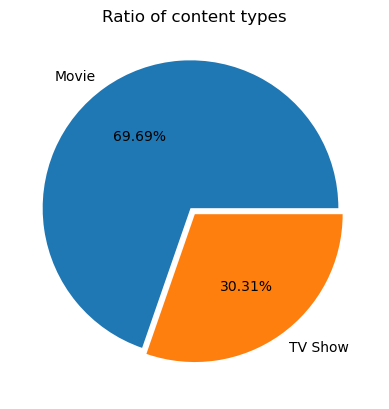

In [13]:
# pie chart 
fig, ax = plt.subplots()
ax.pie(content_type, labels = content_type.index.to_list(), autopct='%1.2f%%', explode=[0.05,0])
ax.set_title('Ratio of content types')

In [14]:
# the range of release year for each type of content
earliest = df.loc[df.groupby('type')['release_year'].idxmin()]
latest = df.loc[df.groupby('type')['release_year'].idxmax()]

earliest = earliest.rename(columns={'release_year': 'earliest_year', 'title': 'earliest_title'})
latest = latest.rename(columns={'release_year': 'latest_year', 'title': 'latest_title'})

summary = pd.merge(earliest, latest, on='type', suffixes=('_earliest', '_latest'))

summary = summary[['type', 'earliest_year', 'earliest_title', 'latest_year', 'latest_title']]
summary

,type,earliest_year,earliest_title,latest_year,latest_title
0,Movie,1942,Prelude to War,2021,My Little Pony: A New Generation
1,TV Show,1925,Pioneers: First Women Filmmakers*,2021,Blood & Water


In [444]:
#number of content release by year
show_by_year = df.groupby('release_year').count().reset_index()[['release_year','show_id']]
show_by_year.rename(columns={'release_year':'release_year','show_id':'show_count'}, inplace=True)
show_by_year

,release_year,show_count
0,1925,1
1,1942,2
2,1943,3
3,1944,3
4,1945,4
...,...,...
69,2017,1030
70,2018,1146
71,2019,1030
72,2020,953


In [459]:
# the year with highest number of show released
show_by_year.sort_values(by='show_count', ascending=False).head(10)

,release_year,show_count
70,2018,1146
71,2019,1030
69,2017,1030
72,2020,953
68,2016,901
73,2021,592
67,2015,555
66,2014,352
65,2013,286
64,2012,236


In [454]:
# number of content release each year
show_by_type = df.groupby(['release_year','type']).count().reset_index()[['release_year','type','show_id']]
show_by_type.rename(columns={'show_id':'show_count'}, inplace=True)
show_by_type = show_by_type.pivot(index = 'release_year', columns='type', values='show_count').fillna(0).astype(int)[-10:]
show_by_type

type,Movie,TV Show
release_year,,
2012,173,63
2013,225,61
2014,264,88
2015,396,159
2016,658,243
2017,765,265
2018,767,379
2019,633,397
2020,517,436


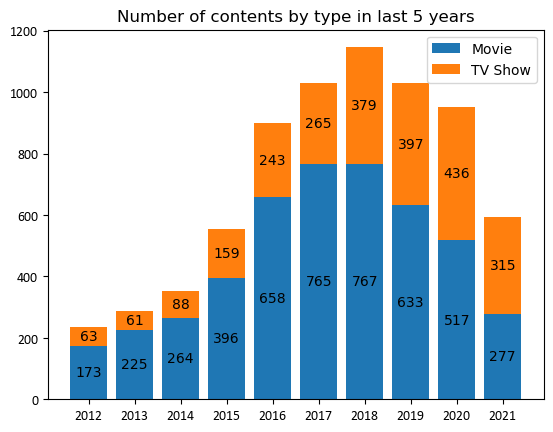

In [453]:
fig, ax = plt.subplots()
width = 0.8
bottom = np.zeros(10)

for type, show_count in show_by_type.items():
    p = ax.bar(show_by_type.index.to_list(), show_count, width, label = type, bottom = bottom)
    bottom += show_count
    ax.bar_label(p, label_type='center')

ax.set_title('Number of contents by type in last 5 years')
ax.set_xticks(show_by_type.index.to_list())
ax.tick_params(axis='both', labelfontfamily='Calibri')
ax.legend()

plt.show()

# Overall and last 5 years analysis and insights

In [19]:
#last 5 years df
L5y = sorted(df['release_year'].unique())[-5:]
df_5y = df[df['release_year'].isin(L5y)].copy()
df_5y.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,first_country,genre,target_age
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No data,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,September,United States,[Documentaries],Teens
1,s2,TV Show,Blood & Water,No data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,September,South Africa,"[International TV Shows, TV Dramas, TV Mysteries]",Adults
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",No data,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,September,No data,"[Crime TV Shows, International TV Shows, TV Ac...",Adults
3,s4,TV Show,Jailbirds New Orleans,No data,No data,No data,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021,September,No data,"[Docuseries, Reality TV]",Adults
4,s5,TV Show,Kota Factory,No data,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021,September,India,"[International TV Shows, Romantic TV Shows, TV...",Adults


In [20]:
# number of content released in each country overall vs last 5 years
def by_country(data):
    c_by_country = data.groupby(['first_country','type']).count().reset_index()[['first_country','type','show_id']]
    c_by_country = c_by_country.pivot(index='first_country',columns='type',values='show_id').fillna(0).astype(int)
    # select the top countries and drop the line with no country data
    c_by_country = c_by_country.sort_values(by=['Movie', 'TV Show'], ascending=False, key=lambda x: c_by_country['Movie'] + c_by_country['TV Show']).head(11).drop(['No data']) 
    return c_by_country

content_by_country = by_country(df)
l5y_content_by_country = by_country(df_5y)

In [21]:
content_by_country

type,Movie,TV Show
first_country,,
United States,2361,841
India,927,81
United Kingdom,382,245
Canada,187,84
Japan,85,172
France,149,64
South Korea,47,165
Spain,129,52
Mexico,86,48


In [22]:
l5y_content_by_country

type,Movie,TV Show
first_country,,
United States,1041,611
India,348,55
United Kingdom,165,145
Canada,108,45
Spain,94,46
South Korea,35,100
Japan,40,93
France,76,48
Mexico,51,36


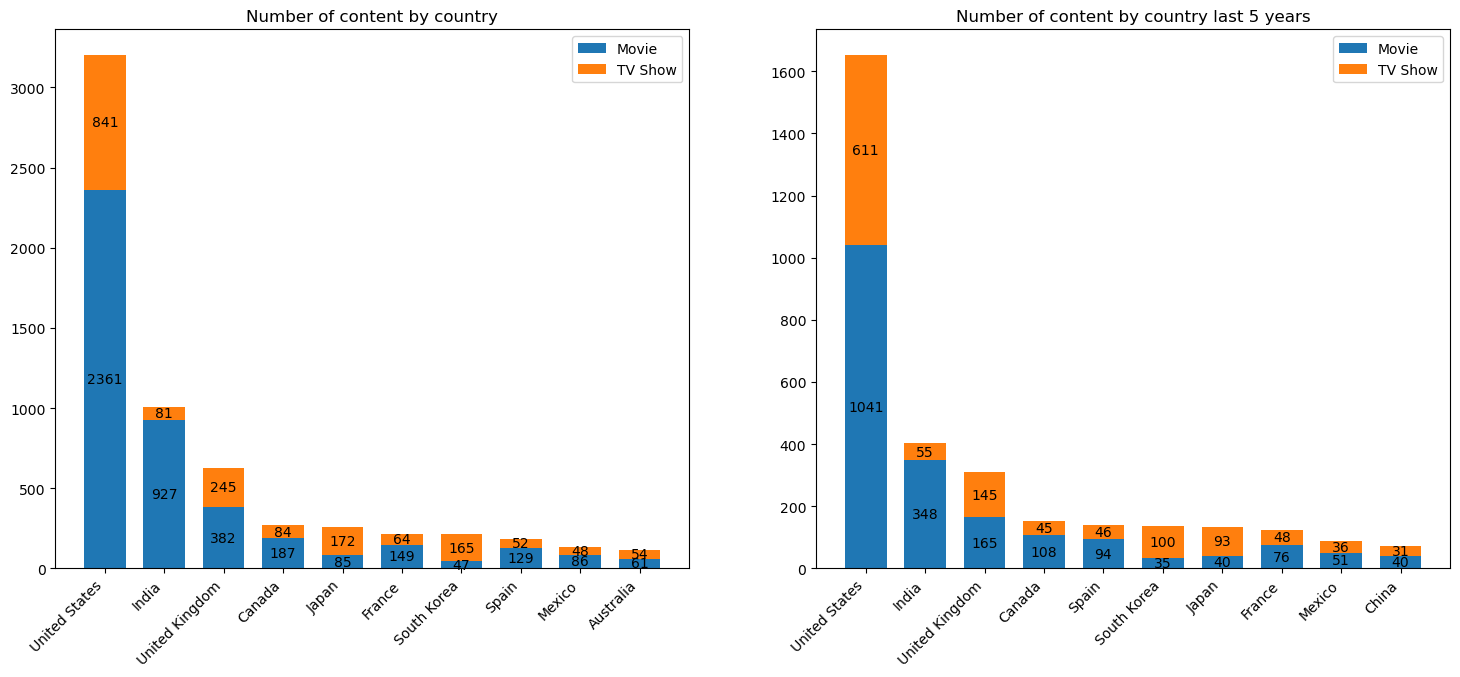

In [23]:
# bar chart comparing overall vs l5ys
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(18,7))
# first overall chart
bottom1 = np.zeros(10)
width = 0.7

for content_type, content_count in content_by_country.items():
    a = ax1.bar(content_by_country.index.to_list(), content_count, width, label = content_type, bottom= bottom1 )
    bottom1 += content_count
    ax1.bar_label(a, label_type = 'center')

ax1.set_title('Number of content by country')
# set the tick lable to rotate 45 degree, but have to set the x tick first before set x tick label
x = np.arange(10)
ax1.set_xticks(x, labels=content_by_country.index )
ax1.set_xticklabels(content_by_country.index, rotation=45, ha='right', fontsize=10)
ax1.legend()

bottom2 = np.zeros(10)
for content_type2, content_count2 in l5y_content_by_country.items():
    a = ax2.bar(l5y_content_by_country.index.to_list(), content_count2, width, label = content_type2, bottom= bottom2 )
    bottom2 += content_count2
    ax2.bar_label(a, label_type = 'center')

ax2.set_title('Number of content by country last 5 years')
ax2.set_xticks(x, labels=l5y_content_by_country.index )
ax2.set_xticklabels(l5y_content_by_country.index, rotation=45, ha='right', fontsize=10)
ax2.legend()
plt.show()

## TV show

In [24]:
# what are the most popular genre for TV shows overall and L5Ys
t1 = pd.DataFrame(df[df['type'] == 'TV Show']['genre'].value_counts().head(10))

In [25]:
t2 = pd.DataFrame(df_5y[df_5y['type'] == 'TV Show']['genre'].value_counts().head(10))
t2

,count
genre,
[Kids' TV],129
"[Crime TV Shows, International TV Shows, TV Dramas]",85
[Reality TV],68
"[International TV Shows, TV Dramas]",68
"[Kids' TV, TV Comedies]",68
[Docuseries],66
"[Crime TV Shows, International TV Shows, Spanish-Language TV Shows]",51
[TV Comedies],50
"[Anime Series, International TV Shows]",49


In [26]:
""" the rise of reality show and crime TV shows. While Kids TV remain to be the most popular TV show, it is clearly seen that crime shows and reality are taking more places in last 5 years
Especially, about 80% of crime show are produced over the L5ys, 70% reality are produced in l5ys 
"""

' the rise of reality show and crime TV shows. While Kids TV remain to be the most popular TV show, it is clearly seen that crime shows and reality are taking more places in last 5 years\nEspecially, about 80% of crime show are produced over the L5ys, 70% reality are produced in l5ys \n'

In [27]:
# what are the most popular genre of TV show for top countries
top10_country = content_by_country.index.to_list()[:10]
df[(df['first_country'].isin(top10_country)) & (df['type'] == 'TV Show')]['genre'].value_counts().head(10)

genre
[Kids' TV]                                                             155
[Reality TV]                                                            81
[Anime Series, International TV Shows]                                  80
[Kids' TV, TV Comedies]                                                 78
[Docuseries]                                                            67
[TV Comedies]                                                           66
[International TV Shows, Korean TV Shows, Romantic TV Shows]            63
[Crime TV Shows, Docuseries]                                            45
[Crime TV Shows, International TV Shows, Spanish-Language TV Shows]     38
[International TV Shows, TV Dramas]                                     34
Name: count, dtype: int64

In [28]:
df_5y[(df_5y['first_country'].isin(top10_country)) & (df_5y['type'] == 'TV Show')]['genre'].value_counts().head(10)

genre
[Kids' TV]                                                             88
[Reality TV]                                                           55
[Kids' TV, TV Comedies]                                                51
[Docuseries]                                                           51
[TV Comedies]                                                          48
[Anime Series, International TV Shows]                                 42
[Crime TV Shows, Docuseries]                                           37
[Crime TV Shows, International TV Shows, Spanish-Language TV Shows]    33
[International TV Shows, Korean TV Shows, Romantic TV Shows]           28
[TV Dramas]                                                            27
Name: count, dtype: int64

In [29]:
"""take a look at the genre we can see the rise in reality TV show in the last 5 years.
While kids tv remained as top 1 popular released content, reality and documentaries taken second and third place, anime TV show become less popular
This can also be indicated that in the last 5 years, most of the TV show content produced/ released on Netflix are reality and Docuseries. As we can see that, there are total 78 reality show on Netflix, 
But 70% of these reality are released in L5Ys, while half of anime shows can be seen as quite old which are released more than 5 years ago
"""

'take a look at the genre we can see the rise in reality TV show in the last 5 years.\nWhile kids tv remained as top 1 popular released content, reality and documentaries taken second and third place, anime TV show become less popular\nThis can also be indicated that in the last 5 years, most of the TV show content produced/ released on Netflix are reality and Docuseries. As we can see that, there are total 78 reality show on Netflix, \nBut 70% of these reality are released in L5Ys, while half of anime shows can be seen as quite old which are released more than 5 years ago\n'

In [30]:
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,first_country,genre,target_age
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No data,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,September,United States,[Documentaries],Teens
1,s2,TV Show,Blood & Water,No data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,September,South Africa,"[International TV Shows, TV Dramas, TV Mysteries]",Adults
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",No data,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,September,No data,"[Crime TV Shows, International TV Shows, TV Ac...",Adults
3,s4,TV Show,Jailbirds New Orleans,No data,No data,No data,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021,September,No data,"[Docuseries, Reality TV]",Adults
4,s5,TV Show,Kota Factory,No data,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021,September,India,"[International TV Shows, Romantic TV Shows, TV...",Adults


In [31]:
# target age in overall and L5Ys for TV show
tv_target = df[df['type']=='TV Show'].groupby('target_age').count()['show_id']
target_ratio = ((tv_target)/len(df[df['type']=='TV Show']))
tv_target_ratio = pd.DataFrame(round(target_ratio*100,2)).rename(columns={'show_id':'ratio'})
tv_target_ratio

,ratio
target_age,
Adults,43.13
Kids,10.10
Older Kids,19.37
Teens,27.40


In [32]:
tv_target_5y = df_5y[df_5y['type']=='TV Show'].groupby('target_age').count()['show_id']
target_ratio_5y = ((tv_target_5y)/len(df_5y[df_5y['type']=='TV Show']))
tv_target_ratio_5y = pd.DataFrame(round(target_ratio_5y*100,2)).rename(columns={'show_id':'ratio'})
tv_target_ratio_5y

,ratio
target_age,
Adults,51.79
Kids,9.43
Older Kids,15.68
Teens,23.10


In [33]:
""" The age target are also in line with the type of tv shows released in L5ys, content with rating for adults are taking more proportion over the last 5 years.
""" 

' The age target are also in line with the type of tv shows released in L5ys, content with rating for adults are taking more proportion over the last 5 years.\n'

In [34]:
ratio_by_age = pd.merge(tv_target_ratio, tv_target_ratio_5y, on='target_age', suffixes=('_total','_l5y')).T
ratio_by_age

target_age,Adults,Kids,Older Kids,Teens
ratio_total,43.13,10.10,19.37,27.4
ratio_l5y,51.79,9.43,15.68,23.1


In [35]:
# what are the target audience of TV shows by different countries
tv_target_by_country = df[(df['first_country'].isin(top10_country)) & (df['type']=='TV Show')].groupby(['target_age','first_country']).count().reset_index()[['first_country','target_age','show_id']]
tv_target_by_country = tv_target_by_country.pivot(index='first_country', columns='target_age',values='show_id').fillna(0).astype(int)

pct_tv_target_country = tv_target_by_country.div(tv_target_by_country.sum(axis=1),axis=0)*100
pct_tv_target_country['update'] = 'total'
pct_tv_target_country


target_age,Adults,Kids,Older Kids,Teens,update
first_country,,,,,
Australia,44.444444,16.666667,24.074074,14.814815,total
Canada,32.142857,21.428571,26.190476,20.238095,total
France,57.812500,25.000000,12.500000,4.687500,total
India,41.975309,9.876543,18.518519,29.629630,total
Japan,37.209302,1.162791,20.348837,41.279070,total
Mexico,68.750000,2.083333,16.666667,12.500000,total
South Korea,33.333333,4.848485,12.727273,49.090909,total
Spain,78.846154,7.692308,5.769231,7.692308,total
United Kingdom,43.673469,14.285714,24.489796,17.551020,total


In [36]:
tv_target_by_country_5y = df_5y[(df_5y['first_country'].isin(top10_country)) & (df_5y['type']=='TV Show')].groupby(['target_age','first_country']).count().reset_index()[['first_country','target_age','show_id']]
tv_target_by_country_5y = tv_target_by_country_5y.pivot(index='first_country', columns='target_age',values='show_id').fillna(0).astype(int)

pct_tv_target_country_5y = round(tv_target_by_country_5y.div(tv_target_by_country_5y.sum(axis=1),axis=0)*100,2)
pct_tv_target_country_5y['update'] = 'l5y'
pct_tv_target_country_5y

target_age,Adults,Kids,Older Kids,Teens,update
first_country,,,,,
Australia,51.35,18.92,16.22,13.51,l5y
Canada,44.44,15.56,17.78,22.22,l5y
France,68.75,14.58,12.50,4.17,l5y
India,58.18,10.91,12.73,18.18,l5y
Japan,44.09,1.08,16.13,38.71,l5y
Mexico,86.11,2.78,11.11,0.00,l5y
South Korea,42.00,3.00,8.00,47.00,l5y
Spain,80.43,8.70,4.35,6.52,l5y
United Kingdom,48.97,14.48,20.00,16.55,l5y


In [37]:
ratio_by_country = pd.concat([pct_tv_target_country, pct_tv_target_country_5y]).reset_index()
ratio_by_country

target_age,first_country,Adults,Kids,Older Kids,Teens,update
0,Australia,44.444444,16.666667,24.074074,14.814815,total
1,Canada,32.142857,21.428571,26.190476,20.238095,total
2,France,57.812500,25.000000,12.500000,4.687500,total
3,India,41.975309,9.876543,18.518519,29.629630,total
4,Japan,37.209302,1.162791,20.348837,41.279070,total
5,Mexico,68.750000,2.083333,16.666667,12.500000,total
6,South Korea,33.333333,4.848485,12.727273,49.090909,total
7,Spain,78.846154,7.692308,5.769231,7.692308,total
8,United Kingdom,43.673469,14.285714,24.489796,17.551020,total
9,United States,40.546968,12.128419,22.829964,24.494649,total


In [38]:
ratio_by_country = pd.concat([pct_tv_target_country, pct_tv_target_country_5y])
ratio_by_country = pd.pivot_table(ratio_by_country, values = ['Adults','Kids','Older Kids','Teens'], index=['first_country','update'])
ratio_by_country = round(ratio_by_country,2)
ratio_by_country

target_age             Adults   Kids  Older Kids  Teens
first_country  update                                  
Australia      l5y      51.35  18.92       16.22  13.51
               total    44.44  16.67       24.07  14.81
Canada         l5y      44.44  15.56       17.78  22.22
               total    32.14  21.43       26.19  20.24
France         l5y      68.75  14.58       12.50   4.17
               total    57.81  25.00       12.50   4.69
India          l5y      58.18  10.91       12.73  18.18
               total    41.98   9.88       18.52  29.63
Japan          l5y      44.09   1.08       16.13  38.71
               total    37.21   1.16       20.35  41.28
Mexico         l5y      86.11   2.78       11.11   0.00
               total    68.75   2.08       16.67  12.50
South Korea    l5y      42.00   3.00        8.00  47.00
               total    33.33   4.85       12.73  49.09
Spain          l5y      80.43   8.70        4.35   6.52
               total    78.85   7.69        5.77   7.69
United Kingdom l5y      48.97  14.48       20.00  16.55
               total    43.67  14.29       24.49  17.55
United States  l5y      49.10  10.80       18.66  21.44
               total    40.55  12.13       22.83  24.49

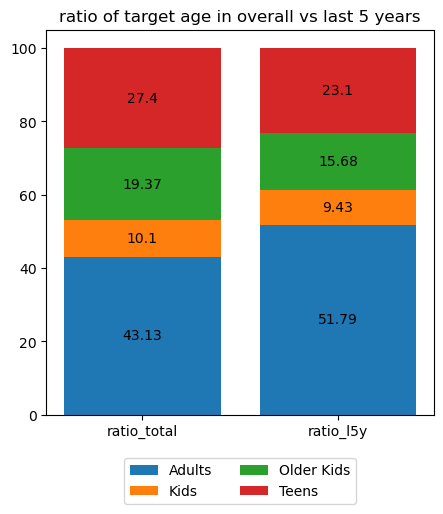

In [320]:
# illustration for the rise in adults targeted contents TV show
## 1 chart for the over vs l5ys target
## 1 chart for breaking by countries

fig, ax1 = plt.subplots(1,1, figsize = (5,5))

width = 0.8
bottom1 = np.zeros(2)

for age_group, age_ratio in ratio_by_age.items():
    chart1 = ax1.bar(ratio_by_age.index.to_list(), age_ratio, width, label = age_group, bottom = bottom1)
    bottom1 += age_ratio
    ax1.bar_label(chart1, label_type ='center')

ax1.set_title('ratio of target age in overall vs last 5 years')
ax1.legend(bbox_to_anchor=(0.5, -0.25), loc='lower center', ncol=2)

### chart for ratio_by country

plt.show()


### Understanding the metality of drawing complicated chart and components of plt.ax

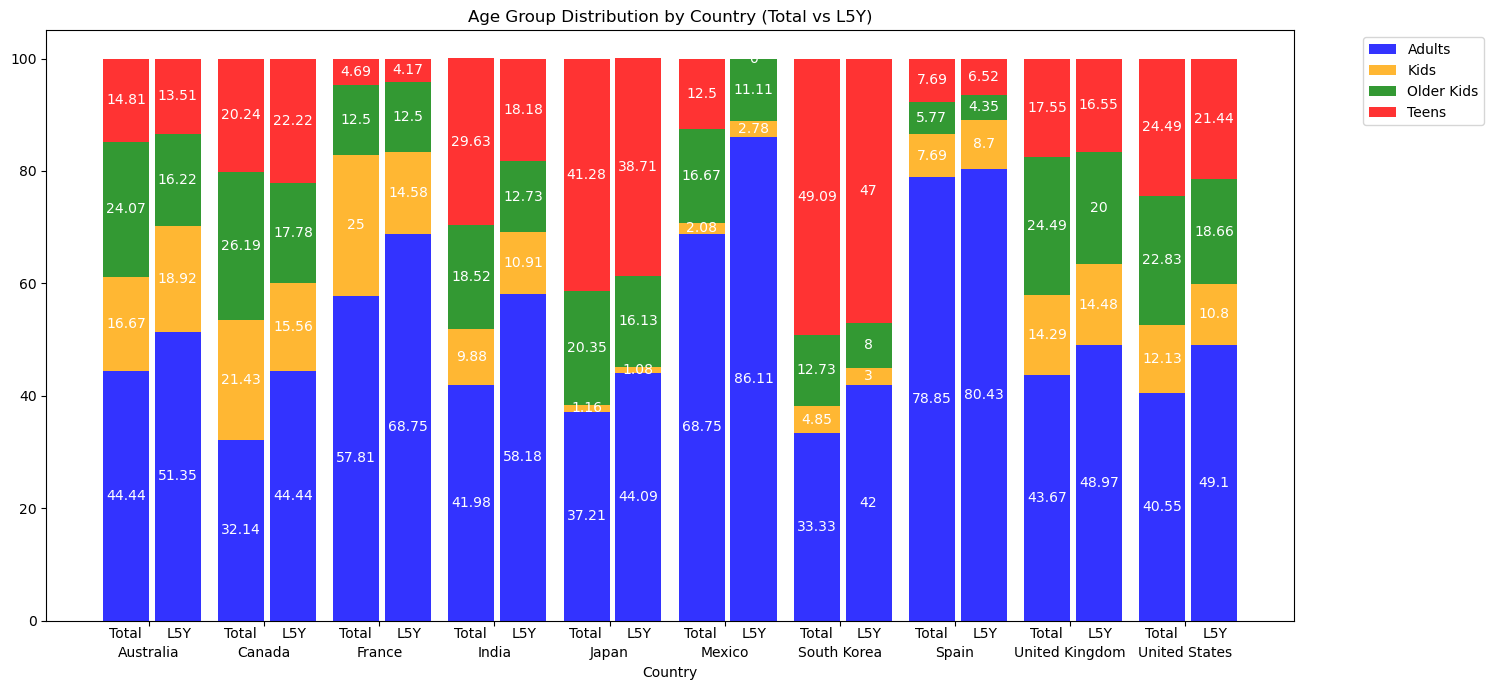

In [40]:
# Get unique countries and age groups
countries = ratio_by_country.index.get_level_values('first_country').unique()
age_groups = ratio_by_country.columns

# Set up the plot
fig, ax = plt.subplots(figsize=(15, 7))

# Set width of bars and positions
bar_width = 0.4
r1 = np.arange(len(countries))
r2 = [x + bar_width + 0.05 for x in r1]
bottom1 = 0
bottom2 = 0
colors = ['blue', 'orange', 'green', 'red']
# Create bars for each age group
for i, age in enumerate(age_groups):
    a1 = ax.bar(r1, ratio_by_country.loc[(slice(None), 'total'), age], width=bar_width, label=age, alpha=0.8, bottom=bottom1, color = colors[i])
    bottom1 += ratio_by_country.loc[(slice(None), 'total'), age]
    a2 = ax.bar(r2, ratio_by_country.loc[(slice(None), 'l5y'), age], width=bar_width, alpha=0.8, bottom=bottom2, color = colors[i])
    bottom2 += ratio_by_country.loc[(slice(None), 'l5y'), age]
    ax.bar_label(a1, label_type = 'center', color = 'white')
    ax.bar_label(a2, label_type = 'center', color = 'white')

# Customize the plot
ax.set_xlabel('Country')
ax.set_title('Age Group Distribution by Country (Total vs L5Y)')
ax.set_xticks([r + bar_width/2 for r in range(len(countries))])
ax.set_xticklabels(countries)
ax.tick_params(axis = 'x', labelbottom=True, pad = 15)

# Add legend
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

for i, country in enumerate(countries):
    ax.text(i - bar_width+0.25, -3, 'Total')
    ax.text(i + bar_width-0.05, -3, 'L5Y')

# Adjust layout and display
plt.tight_layout()
plt.show()


In [41]:
# length of the TV show (consistent with last 5 years)
tv_show_length = df[df['type'] == 'TV Show'].groupby('duration').count()['show_id'].sort_values(ascending=False)
ratio_length = ((tv_show_length)/len(df[df['type']=='TV Show']))
ratio_length_tv = pd.DataFrame(ratio_length*100)
tv_show_length

duration
1 Season      1791
2 Seasons      421
3 Seasons      198
4 Seasons       94
5 Seasons       64
6 Seasons       33
7 Seasons       23
8 Seasons       17
9 Seasons        9
10 Seasons       6
12 Seasons       2
13 Seasons       2
15 Seasons       2
11 Seasons       1
17 Seasons       1
Name: show_id, dtype: int64

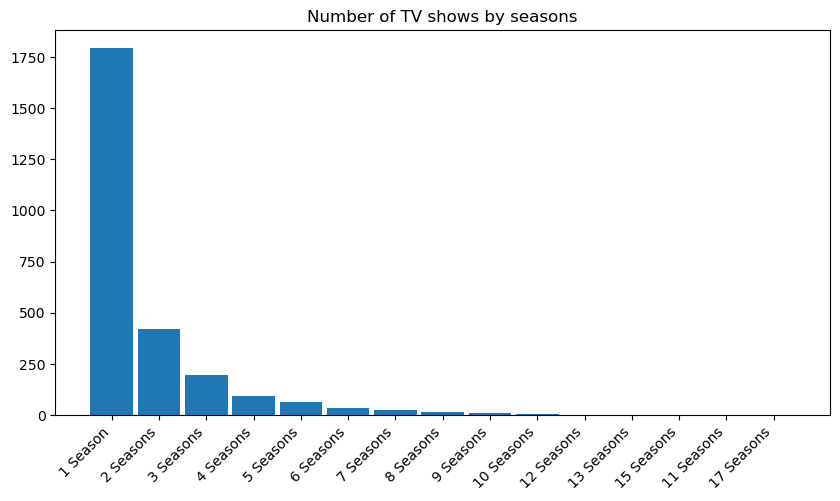

In [52]:
# illustration for tv show duration
fig, ax = plt.subplots(figsize = (10,5))

ax.bar(np.arange(len(tv_show_length)) +1, tv_show_length, width=0.9)
ax.set_title('Number of TV shows by seasons')
ax.set_xticks(np.arange(len(tv_show_length)) +1,labels = tv_show_length.index.to_list())
ax.set_xticklabels(tv_show_length.index.to_list(), rotation=45, ha='right', fontsize=10)

plt.show()

In [43]:
df.loc[df['duration'] == '17 Seasons']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,first_country,genre,target_age
548,s549,TV Show,Grey's Anatomy,No data,"Ellen Pompeo, Sandra Oh, Katherine Heigl, Just...",United States,2021-07-03,2020,TV-14,17 Seasons,"Romantic TV Shows, TV Dramas",Intern (and eventual resident) Meredith Grey f...,2021,July,United States,"[Romantic TV Shows, TV Dramas]",Teens


In [44]:
# which month these contents are added
tv_show_by_month = pd.DataFrame(df_5y[df_5y['type']=='TV Show'].groupby('month_added').count()['show_id']).reset_index()
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
tv_show_by_month['month_added'] = pd.Categorical(tv_show_by_month['month_added'], categories=month_order, ordered=True)
tv_show_by_month = tv_show_by_month.sort_values('month_added')
tv_show_by_month

,month_added,show_id
4,January,127
3,February,123
7,March,143
0,April,140
8,May,134
6,June,172
5,July,184
1,August,157
11,September,176
10,October,145


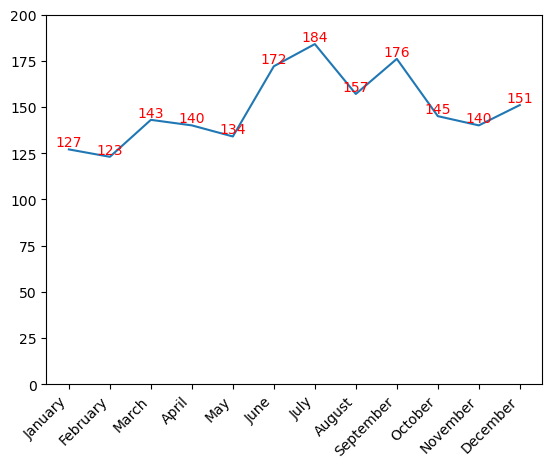

In [441]:
fig, ax = plt.subplots(1,1)
x = np.arange(len(tv_show_by_month))
y = tv_show_by_month['show_id']

plot = ax.plot(x,y)
ax.set_xticks(np.arange(len(tv_show_by_month)))
ax.set_xticklabels(labels = tv_show_by_month['month_added'].to_list(), rotation=45, ha='right', fontsize=10)
ax.set_ylim(0,200)
for i, v in enumerate(y):
    ax.text(i,v, v, ha="center", va = 'bottom', color = 'red')

## Movie analysis

In [238]:
# number of movie released by country
movie_by_country = df[df['type'] == 'Movie'].groupby('first_country').count()['show_id']
movie_ratio = (movie_by_country/len(df[df['type'] == 'Movie']))*100
movie_ratio_by_country = round(movie_ratio,2).sort_values(ascending=False).drop('No data').reset_index().head(5)
movie_ratio_by_country.rename(columns= {'show_id':'ratio'}, inplace = True)
movie_ratio_by_country.loc[5,'first_country'] = 'Other'
movie_ratio_by_country.loc[5,'ratio'] = 100 - sum(movie_ratio_by_country.loc[0:4,'ratio'])
movie_ratio_by_country

,first_country,ratio
0,United States,38.54
1,India,15.13
2,United Kingdom,6.24
3,Canada,3.05
4,France,2.43
5,Other,34.61


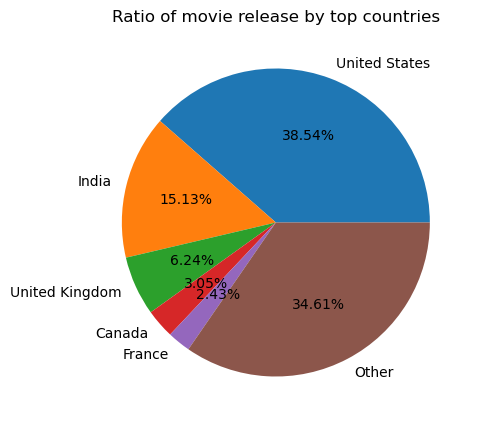

In [240]:
# l5y
fig, ax = plt.subplots(1,1,figsize = (10,5))

colors =  ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']
ax.pie(movie_ratio_by_country['ratio'], labels = movie_ratio_by_country['first_country'].to_list(), autopct='%1.2f%%', colors= colors)
ax.set_title('Ratio of movie release by top countries', loc='center')
plt.show()

In [90]:
# the top genre of movie
genre_by_movie = df[df['type'] == 'Movie']['genre'].value_counts().reset_index().head(20)
genre_by_movie

,genre,count
0,"[Dramas, International Movies]",362
1,[Documentaries],359
2,[Stand-Up Comedy],334
3,"[Comedies, Dramas, International Movies]",274
4,"[Dramas, Independent Movies, International Mov...",252
5,[Children & Family Movies],215
6,"[Children & Family Movies, Comedies]",201
7,"[Documentaries, International Movies]",186
8,"[Dramas, International Movies, Romantic Movies]",180
9,"[Comedies, International Movies]",176


In [82]:
genre_by_movie_l5y = df_5y[df_5y['type'] == 'Movie']['genre'].value_counts().reset_index().head(10)
genre_by_movie_l5y

,genre,count
0,[Documentaries],219
1,[Stand-Up Comedy],216
2,"[Dramas, International Movies]",169
3,"[Dramas, Independent Movies, International Mov...",139
4,"[Comedies, Dramas, International Movies]",123
5,[Children & Family Movies],114
6,"[Documentaries, International Movies]",97
7,"[Dramas, International Movies, Romantic Movies]",91
8,"[Children & Family Movies, Comedies]",86
9,"[Comedies, International Movies]",84


In [297]:
# the target age of movie
movie_target_age = df[df['type'] == 'Movie'].groupby('target_age').count()['show_id'].astype(int)
movie_target_age_l5y = df_5y[df_5y['type'] == 'Movie'].groupby('target_age').count()['show_id'].astype(int)

In [303]:
m_target_age = pd.merge(movie_target_age, movie_target_age_l5y, on = movie_target_age.index, suffixes= ('_total','_l5y'))
m_target_age = m_target_age.set_index('key_0')
m_target_age

,show_id_total,show_id_l5y
key_0,,
Adults,2940,1548
Kids,298,184
Older Kids,971,429
Teens,1917,798


In [340]:
m_ratio = round(m_target_age.div(m_target_age.sum(axis = 0), axis = 1)*100,1)
m_ratio.rename(columns={'show_id_total':'ratio_total','show_id_l5y':'ratio_l5y'}, inplace = True)
m_ratio = m_ratio.T
m_ratio

key_0,Adults,Kids,Older Kids,Teens
ratio_total,48.0,4.9,15.9,31.3
ratio_l5y,52.3,6.2,14.5,27.0


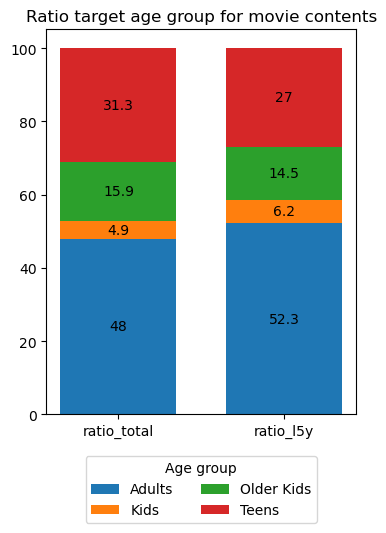

In [341]:
fig, ax = plt.subplots(1,1,figsize= (4,5))

bottom = np.zeros(2)
width = 0.7

for age_group, age_ratio in m_ratio.items():
    m = ax.bar(m_ratio.index.to_list(), age_ratio, width, label = age_group, bottom = bottom)
    bottom += age_ratio
    ax.bar_label(m, label_type='center')
    
ax.set_title('Ratio target age group for movie contents')
ax.legend(title = 'Age group',bbox_to_anchor=(0.5, -0.3), loc='lower center', ncol=2)

plt.show()

In [ ]:
# the length and release month
movie_length = df[df['type'] == 'Movie'][['duration','show_id']]
movie_length['duration'] = movie_length['duration'].apply(lambda x: x.split(' ')[0]).astype(int)
movie_length

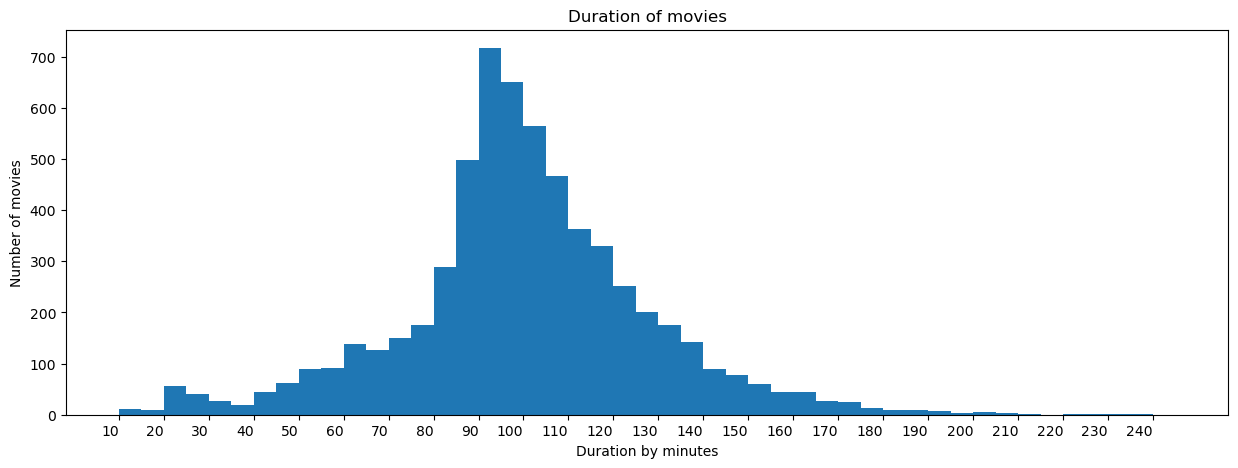

In [437]:

# illustration
fig, ax = plt.subplots(figsize = (15,5))

x = movie_length['duration']
bins = np.arange(10,250,5)

ax.hist(x,bins = bins)
ax.set_xticks(np.arange(10,250,10))
ax.set_xticklabels(np.arange(10,250,10), ha='right', fontsize=10)
ax.set_xlabel('Duration by minutes')
ax.set_ylabel('Number of movies')
ax.set_title('Duration of movies')

plt.show()

In [438]:
movie_show_by_month = pd.DataFrame(df_5y[df_5y['type']=='Movie'].groupby('month_added').count()['show_id']).reset_index()
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
movie_show_by_month['month_added'] = pd.Categorical(movie_show_by_month['month_added'], categories=month_order, ordered=True)
movie_show_by_month = movie_show_by_month.sort_values('month_added')
movie_show_by_month

,month_added,show_id
4,January,219
3,February,209
7,March,255
0,April,272
8,May,264
6,June,274
5,July,275
1,August,243
11,September,239
10,October,232


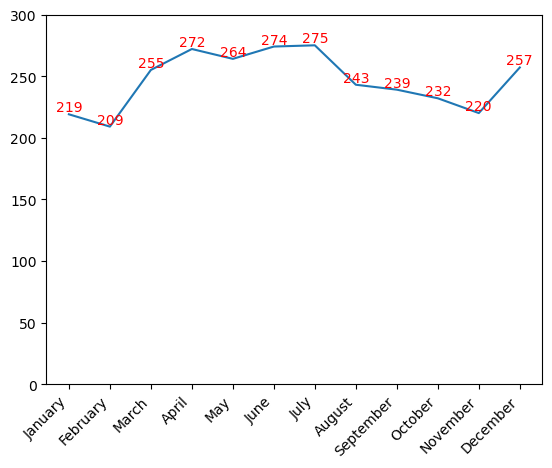

In [440]:
fig, ax = plt.subplots(1,1)
x = np.arange(len(movie_show_by_month))
y = movie_show_by_month['show_id']

plot = ax.plot(x,y)
ax.set_xticks(np.arange(len(movie_show_by_month)))
ax.set_xticklabels(labels = movie_show_by_month['month_added'].to_list(), rotation=45, ha='right', fontsize=10)
ax.set_ylim(0,300)
for i, v in enumerate(y):
    ax.text(i,v, v, ha="center", va = 'bottom', color = 'red')